<a href="https://colab.research.google.com/github/alxndrno/ChallengePythonDataScience/blob/main/alurastorebr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
#Faturamento da Loja 1
faturamentoLoja1 = round(loja["Preço"].sum(),2)
print(f"O faturamento da Loja 1 é de R$ {faturamentoLoja1:,.2f}")
#Faturamento da Loja 2
faturamentoLoja2 = round(loja2["Preço"].sum(),2)
print(f"O faturamento da Loja 2 é de R$ {faturamentoLoja2:,.2f}")
#Faturamento da Loja 3
faturamentoLoja3 = round(loja3["Preço"].sum(),2)
print(f"O faturamento da Loja 3 é de R$ {faturamentoLoja3:,.2f}")
#Faturamento da Loja 4
faturamentoLoja4 = round(loja4["Preço"].sum(),2)
print(f"O faturamento da Loja 4 é de R$ {faturamentoLoja4:,.2f}")

faturamentoTodasLojas = {"Loja 1" : faturamentoLoja1, "Loja 2" : faturamentoLoja2, "Loja 3" : faturamentoLoja3, "Loja 4" : faturamentoLoja4}


lojaMenor = min(faturamentoTodasLojas, key=faturamentoTodasLojas.get) #Pegando o nome da loja que faturou menos baseado nas chaves do dicionario
menorFaturamento = faturamentoTodasLojas[lojaMenor]

lojaMaior = max(faturamentoTodasLojas, key=faturamentoTodasLojas.get) #Pegando o nome da loja que faturou mais baseado nas chaves do dicionario
maiorFaturamento = faturamentoTodasLojas[lojaMaior]

print(f"\n A loja que faturou menos é a {lojaMenor}, com faturamento de {menorFaturamento:,.2f} ")
print(f"\n A loja que faturou mais é a {lojaMaior}, com faturamento de {maiorFaturamento:,.2f} ")

O faturamento da Loja 1 é de R$ 1,534,509.12
O faturamento da Loja 2 é de R$ 1,488,459.06
O faturamento da Loja 3 é de R$ 1,464,025.03
O faturamento da Loja 4 é de R$ 1,384,497.58

 A loja que faturou menos é a Loja 4, com faturamento de 1,384,497.58 

 A loja que faturou mais é a Loja 1, com faturamento de 1,534,509.12 


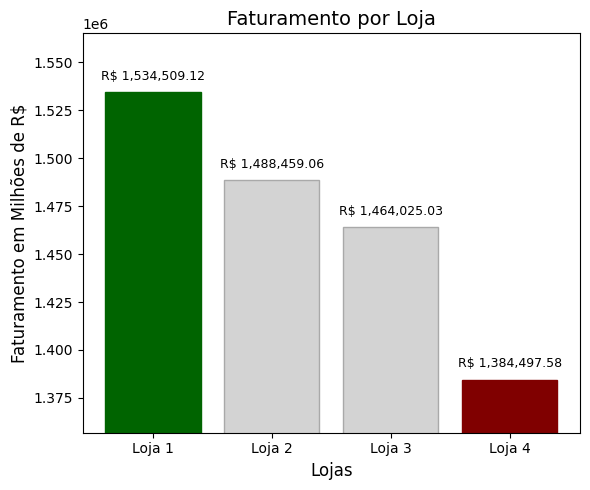

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #importando as bibliotecas necessarias

x = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"] #eixo x com cada uma das lojas
y = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamentoLoja4] #eixo y com o faturamento de cada uma das lojas

plt.figure(figsize=(6, 5)) #tamanho da imagem
barras = plt.bar(x, y, color='lightgray', edgecolor='darkgray') #barras padrão

plt.ylim(min(y) * 0.98, max(y) * 1.02) #definindo altura minima e maxima para os eixos, pra conseguir visualizar melhor a diferença entre os valores

plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento em Milhões de R$", fontsize=12)

for barra in barras:
    valorAlturaBarra = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, valorAlturaBarra + 5000, #espaço entre o texto com os valores e a barra
             f"R$ {valorAlturaBarra:,.2f}", ha='center', va='bottom', fontsize=9) #alinhando o texto e definindo a fonte

indice_maior = y.index(max(y))
indice_menor = y.index(min(y))
barras[indice_maior].set_color('darkgreen') #pinta o maior valor de verde
barras[indice_menor].set_color('maroon') #pinta o menor valor de vermelho

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

listadeCategorias = [  #lista de categorias de cada loja, somando a quantidade dos produtos de cada uma das categorias
    loja["Categoria do Produto"].value_counts(),
    loja2["Categoria do Produto"].value_counts(),
    loja3["Categoria do Produto"].value_counts(),
    loja4["Categoria do Produto"].value_counts()
]

categorias = [  #lista de categorias que vamos somar
    "moveis",
    "eletronicos",
    "brinquedos",
    "esporte e lazer",
    "eletrodomesticos",
    "utilidades domesticas",
    "livros",
    "instrumentos musicais"
]

def somaCategoria(categoria): #função pra somar as categorias entre si, exemplo: somar todos os móveis
    soma = 0
    for loja_categoria in listadeCategorias:
        soma += loja_categoria.get(categoria)
    return soma
valores = []
for categoria in categorias:
    total = somaCategoria(categoria)
    valores.append(total)
    print(f"A categoria {categoria.title()} vendeu um total de R$ {total:.2f}") #title para capitalizar

A categoria Moveis vendeu um total de R$ 1901.00
A categoria Eletronicos vendeu um total de R$ 1775.00
A categoria Brinquedos vendeu um total de R$ 1304.00
A categoria Esporte E Lazer vendeu um total de R$ 1106.00
A categoria Eletrodomesticos vendeu um total de R$ 1091.00
A categoria Utilidades Domesticas vendeu um total de R$ 760.00
A categoria Livros vendeu um total de R$ 756.00
A categoria Instrumentos Musicais vendeu um total de R$ 741.00


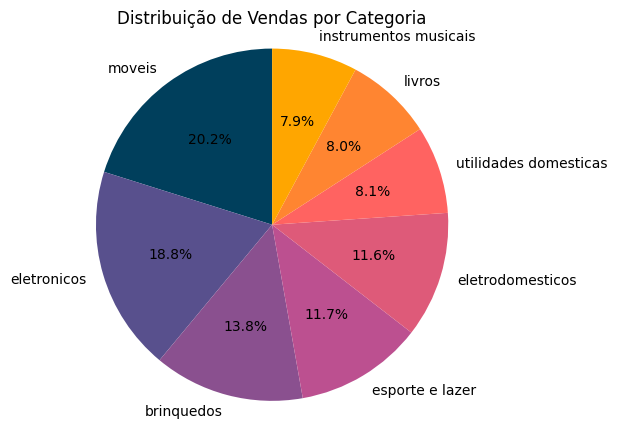

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cores = ["#003f5c","#58508d","#8a508f","#bc5090","#de5a79","#ff6361","#ff8531","#ffa600"] #cores para o grafico de pizza

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=categorias, colors=cores, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Vendas por Categoria')
plt.axis('equal')
plt.show()


In [ ]:
dicionariosLojas = [ #lista de dicionarios de cada loja, com a categoria como chave e a quantidade como elemento
    dict(categoriasLoja1),
    dict(categoriasLoja2),
    dict(categoriasLoja3),
    dict(categoriasLoja4)
]

for i, dicionario in enumerate(dicionariosLojas, start=1): #enumerate vai colocar no print o número de cada loja
    maisPopular = max(dicionario, key=dicionario.get).title()
    menosPopular = min(dicionario, key=dicionario.get).title() #title para capitalizar cada palavra de cada categoria, pois originalmente são em minúsculo

    print(f"A categoria mais popular na Loja {i} é a {maisPopular}")
    print(f"A categoria menos popular na Loja {i} é a {menosPopular}\n")

A categoria mais popular na Loja 1 é a Moveis
A categoria menos popular na Loja 1 é a Instrumentos Musicais

A categoria mais popular na Loja 2 é a Moveis
A categoria menos popular na Loja 2 é a Utilidades Domesticas

A categoria mais popular na Loja 3 é a Moveis
A categoria menos popular na Loja 3 é a Instrumentos Musicais

A categoria mais popular na Loja 4 é a Moveis
A categoria menos popular na Loja 4 é a Instrumentos Musicais



# 3. Média de Avaliação das Lojas

In [ ]:
def mediaAvaliacao(loja):
    soma = 0 #começando a soma no 0
    for i in range(len(loja)): #loop que percorre cada uma das linhas
        soma += loja.iloc[i]["Avaliação da compra"] #acessa cada uma das linhas (no caso i), da coluna de avaliação. pega o valor dessa linha e atribui na soma. repete isso pra cada linha
    media = soma / len(loja) #soma dividida pela quantidade de linhas
    return media

for i in range (len(lojas)): #percorre por cada uma das 4 lojas
  media = mediaAvaliacao(lojas[i]) #chama a funçao atribuindo o i como índice/numero da loja, a função vai ser aplicada para cada uma dessas lojas
  print(f"A Loja {i+1} tem uma média de avaliação de {media:.3f}") #printa o nome da loja com o numero correspondente (i+1, pq i começa em 0), depois printa a media arredondada

A Loja 1 tem uma média de avaliação de 3.996
A Loja 2 tem uma média de avaliação de 4.037
A Loja 3 tem uma média de avaliação de 4.048
A Loja 4 tem uma média de avaliação de 3.996


# 4. Produtos Mais e Menos Vendidos

In [ ]:
quantosProdutos = [ #dicionario com os produtos como chave e a quantidade que cada um se repete na lista como elemento
    dict(loja["Produto"].value_counts()),
    dict(loja2["Produto"].value_counts()),
    dict(loja3["Produto"].value_counts()),
    dict(loja4["Produto"].value_counts())]

for i in range(len(quantosProdutos)): #novamente iterando para dar print no nome das lojas e pegando a chave correspondente a qual vendeu mais/menos para printar também
    print(f"Na Loja {i+1}, o produto mais vendido foi \"{max(quantosProdutos[i], key=quantosProdutos[i].get)}\" e o produto menos vendido foi \"{min(quantosProdutos[i], key=quantosProdutos[i].get)}\"\n")


Na Loja 1, o produto mais vendido foi "Cama box" e o produto menos vendido foi "Guitarra"

Na Loja 2, o produto mais vendido foi "Iniciando em programação" e o produto menos vendido foi "Jogo de tabuleiro"

Na Loja 3, o produto mais vendido foi "Kit banquetas" e o produto menos vendido foi "Blocos de montar"

Na Loja 4, o produto mais vendido foi "Cama box" e o produto menos vendido foi "Guitarra"



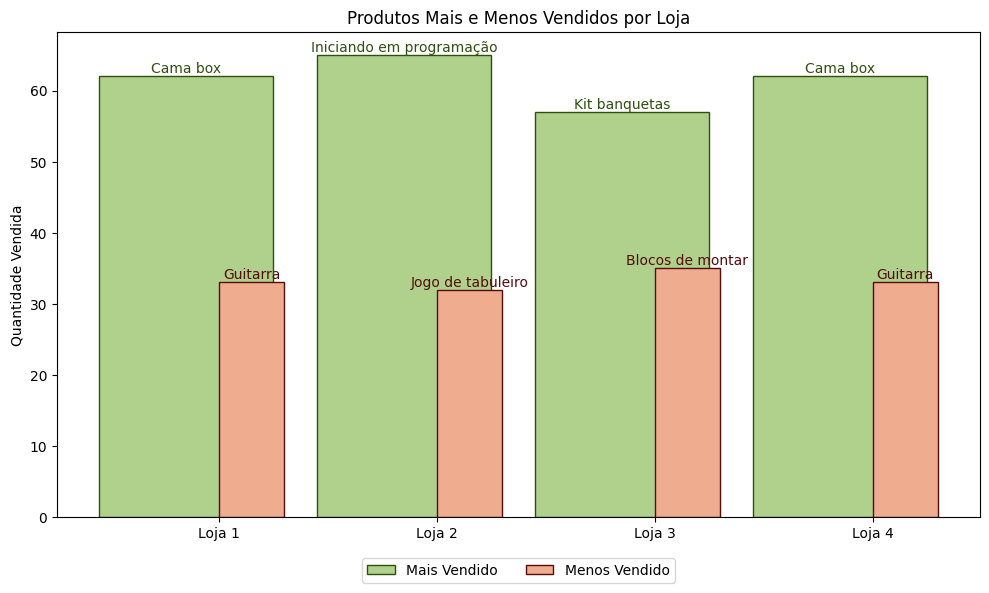

In [ ]:
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
produtos_mais_vendidos = []
quantidades_mais_vendidos = []
produtos_menos_vendidos = []
quantidades_menos_vendidos = []


for i in range(len(quantosProdutos)): #extrair os dados dos dicionarios
    loja_dict = quantosProdutos[i]

    produto_mais = max(loja_dict, key=loja_dict.get) #pega a chave
    quantidade_mais = loja_dict[produto_mais] #pega a quantidade

    produto_menos = min(loja_dict, key=loja_dict.get)
    quantidade_menos = loja_dict[produto_menos]

    produtos_mais_vendidos.append(produto_mais)
    quantidades_mais_vendidos.append(quantidade_mais)

    produtos_menos_vendidos.append(produto_menos)
    quantidades_menos_vendidos.append(quantidade_menos)

x = range(len(nomes_lojas))  #nomes das lojas no eixo x

plt.figure(figsize=(10, 6))

plt.bar(x, quantidades_mais_vendidos, color="#b0d18b", edgecolor="#2f4f10", label='Mais Vendido')
plt.bar([i + 0.3 for i in x], quantidades_menos_vendidos, color="#f0ac8f", edgecolor="#540b0b", label='Menos Vendido', width=0.3) #deslocado pra não sobrepor

plt.xticks([i + 0.15 for i in x], nomes_lojas)
plt.ylabel("Quantidade Vendida")
plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Mostrar os nomes dos produtos acima das barras
for i in x:
    plt.text(i, quantidades_mais_vendidos[i] + 0.5, produtos_mais_vendidos[i], ha='center', color='#2f4f10')
    plt.text(i + 0.3, quantidades_menos_vendidos[i] + 0.5, produtos_menos_vendidos[i], ha='center', color='#540b0b')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
def mediaFrete(loja): #reutilizei a funcao de media das avaliações
    soma = 0
    for i in range(len(loja)): #loop que percorre cada uma das linhas
        soma += loja.iloc[i]["Frete"] #acessa cada uma das linhas da coluna frete
    media = soma / len(loja) #soma dividida pela quantidade de linhas
    return media

for i in range (len(lojas)): #percorre por cada uma das 4 lojas
  media = mediaFrete(lojas[i]) #chama a funçao atribuindo o i como índice/numero da loja, a função vai ser aplicada para cada uma dessas lojas
  print(f"A Loja {i+1} tem uma frete médio de R$ {media:.2f}") #printa o nome da loja com o numero correspondente (i+1, pq i começa em 0), depois printa a media arredondada

A Loja 1 tem uma frete médio de R$ 31.28
A Loja 2 tem uma frete médio de R$ 33.62
A Loja 3 tem uma frete médio de R$ 33.07
A Loja 4 tem uma frete médio de R$ 31.28


In [ ]:
dicionarioCompletoLoja1 = {
    "Faturamento": f"R$ {faturamentoLoja1:,.2f}",
    "Média de Avaliação": float(round(mediaAvaliacao(loja),3)),
    "Média de Frete": f"R$ {mediaFrete(loja):,.2F}",
    "Produto Mais Vendido": max(dict(loja["Produto"].value_counts()), key=dict(loja["Produto"].value_counts()).get),
    "Produto Menos Vendido": min(dict(loja["Produto"].value_counts()), key=dict(loja["Produto"].value_counts()).get)
}

dicionarioCompletoLoja2 = {
    "Faturamento": f"R$ {faturamentoLoja2:,.2f}",
    "Média de Avaliação": float(round(mediaAvaliacao(loja2),3)),
    "Média de Frete": f"R$ {mediaFrete(loja2):,.2F}",
    "Produto Mais Vendido": max(dict(loja2["Produto"].value_counts()), key=dict(loja2["Produto"].value_counts()).get),
    "Produto Menos Vendido": min(dict(loja2["Produto"].value_counts()), key=dict(loja2["Produto"].value_counts()).get)
}

dicionarioCompletoLoja3 = {
    "Faturamento": f"R$ {faturamentoLoja3:,.2f}",
    "Média de Avaliação": float(round(mediaAvaliacao(loja3),3)),
    "Média de Frete": f"R$ {mediaFrete(loja3):,.2F}",
    "Produto Mais Vendido": max(dict(loja3["Produto"].value_counts()), key=dict(loja3["Produto"].value_counts()).get),
    "Produto Menos Vendido": min(dict(loja3["Produto"].value_counts()), key=dict(loja3["Produto"].value_counts()).get)
}

dicionarioCompletoLoja4 = {
    "Faturamento": f"R$ {faturamentoLoja4:,.2f}",
    "Média de Avaliação": float(round(mediaAvaliacao(loja4),3)),
    "Média de Frete": f"R$ {mediaFrete(loja4):,.2F}",
    "Produto Mais Vendido": max(dict(loja4["Produto"].value_counts()), key=dict(loja4["Produto"].value_counts()).get),
    "Produto Menos Vendido": min(dict(loja4["Produto"].value_counts()), key=dict(loja4["Produto"].value_counts()).get)
}

dicionarioFinal = [dicionarioCompletoLoja1, dicionarioCompletoLoja2, dicionarioCompletoLoja3, dicionarioCompletoLoja4]

for i in range(len(lojas)):
  dici = dicionarioFinal[i]
  print(f"Desempenho da Loja {i+1}: ")
  for chave, valor in dici.items():
    print(f"{chave}: {valor}")
  print("\n")

Desempenho da Loja 1: 
Faturamento: R$ 1,534,509.12
Média de Avaliação: 3.996
Média de Frete: R$ 31.28
Produto Mais Vendido: Cama box
Produto Menos Vendido: Guitarra


Desempenho da Loja 2: 
Faturamento: R$ 1,488,459.06
Média de Avaliação: 4.037
Média de Frete: R$ 33.62
Produto Mais Vendido: Iniciando em programação
Produto Menos Vendido: Jogo de tabuleiro


Desempenho da Loja 3: 
Faturamento: R$ 1,464,025.03
Média de Avaliação: 4.048
Média de Frete: R$ 33.07
Produto Mais Vendido: Kit banquetas
Produto Menos Vendido: Blocos de montar


Desempenho da Loja 4: 
Faturamento: R$ 1,384,497.58
Média de Avaliação: 3.996
Média de Frete: R$ 31.28
Produto Mais Vendido: Cama box
Produto Menos Vendido: Guitarra




Considerando os dados acima, podemos afirmar que:


A Loja 1 tem o melhor desempenho em comparação as outras 3 quando se trata de faturamento e frete.

A loja 2 possui bom faturamento, boa avaliação, apesar do frete alto. Importante notar que seu produto mais vendido pertence a categoria livros, uma das menos vendáveis.

A Loja 3 possui a melhor avaliação das 4 lojas, e vende kit de banquetas (da categoria móveis, a mais vendável) e frete mediano

A Loja 4 possui menor faturamento, menor avaliação, mas também menor frete. Mesmo vendendo os mesmos produtos da Loja 1, não consegue atingir o mesmo valor.


Com base nesta análise, acredito que seja melhor vender a Loja 4, por conta do seu desempenho. Como vende itens similares a Loja 1, que é a com maior faturamento, podemos centralizar as vendas desses itens para a Loja 1 e investir nas outras 2 lojas com os recursos obtidos após a venda da Loja 4

---


